In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix


In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sh

In [12]:
import torch

In [13]:
# import torchvision.datasets as dsets
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torchvision.utils import save_image
import os

transform = transforms.Compose([
    transforms.Resize(32),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

mnist_train = MNIST(root='./data', train=True, transform=transform, download=True)
output_dir = './datasets/mnist2svhn/trainA'
os.makedirs(output_dir, exist_ok=True)
for idx, (img, number) in enumerate(mnist_train):
    save_image(img, f'{output_dir}/{idx}.png')
    if idx >= 10000:
        break  # use limited samples for quick training

In [14]:
import scipy.io
from torchvision.datasets import SVHN

svhn_train = SVHN(root='./data', split='train', download=True, transform=transform)
output_dir = './datasets/mnist2svhn/trainB'
os.makedirs(output_dir, exist_ok=True)
for idx, (img, _) in enumerate(svhn_train):
    save_image(img, f'{output_dir}/{idx}.png')
    if idx >= 10000:
        break

In [9]:
# Train CycleGAN to learn style transfer from MNIST to SVHN
!python train.py --dataroot ./datasets/mnist2svhn --name mnist2svhn_cyclegan --model cycle_gan --n_epochs 1 --n_epochs_decay 1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/mnist2svhn         	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [12]:
!python test.py --dataroot ./datasets/mnist2svhn \
                --name mnist2svhn_cyclegan \
                --model test \
                --no_dropout \
                --model_suffix _A

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/mnist2svhn         	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!cp -r results/mnist2svhn_cyclegan/ /content/drive/MyDrive/

In [ ]:
# Use the translated images as source for classifier
# You would load generated images from ./results/mnist2svhn_cyclegan/test_latest/images/
# Then train a classifier with the same architecture as in DANN
# You may need to re-use FeatureExtractor and LabelClassifier from your DANN setup

## Evaluation
Теперь можно обучить классификатор на переведённом MNIST (в стиле SVHN),
а затем протестировать его на настоящем SVHN и сравнить результаты с DANN.
Также можно визуализировать примеры переведённых картинок и построить графики точности/ошибки.

In [4]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch

class TranslatedMNISTDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])
        self.labels = labels[:len(self.image_paths)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# MNIST labels (используем те же, что при генерации картинок)
from torchvision.datasets import MNIST
mnist = MNIST(root='./data', train=True, download=True)
mnist_labels = [label for _, label in mnist]

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

translated_dataset = TranslatedMNISTDataset(
    image_dir='./results/mnist2svhn_cyclegan/test_latest/images',
    labels=mnist_labels,
    transform=transform
)

translated_loader = DataLoader(translated_dataset, batch_size=64, shuffle=True)


In [5]:
# мокаем dann_model.py
import torch
import torch.nn as nn
import torch.nn.functional as F


class GRL(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.alpha, None


class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 48, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
    def forward(self, x):
        return self.net(x).view(x.size(0), -1)


class LabelClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(48*5*5, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        return self.classifier(x)


class DomainDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(48*5*5, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x, alpha):
        x = GRL.apply(x, alpha)
        return self.discriminator(x)

In [6]:
# мокаем train_eval.py (evaluate)
def evaluate(model, dataloader, device):
    model.to(device)
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100 * correct / total
    print(f"Accuracy: {acc:.2f}%")
    return acc


In [26]:
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

F = FeatureExtractor().to(device)
C = LabelClassifier().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(F.parameters()) + list(C.parameters()), lr=1e-3)


In [32]:
from torchvision.datasets import SVHN

svhn_test_dataset = SVHN(root='./data', split='test', download=True,
                         transform=transforms.Compose([
                             transforms.Resize((32, 32)),
                             transforms.ToTensor()  # RGB
                         ]))

svhn_test_loader = torch.utils.data.DataLoader(svhn_test_dataset, batch_size=128, shuffle=False)


In [33]:
for epoch in range(200):
    F.train()
    C.train()
    total_loss = 0
    for images, labels in translated_loader:
        images, labels = images.to(device), labels.to(device)

        features = F(images)
        preds = C(features)

        loss = criterion(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    evaluate(nn.Sequential(F, C), svhn_test_loader, device)
    if epoch%10==0:
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(translated_loader):.4f}")


Accuracy: 10.63%
Epoch 1, Loss: 0.0011
Accuracy: 10.56%
Accuracy: 10.54%
Accuracy: 10.55%
Accuracy: 10.63%
Accuracy: 10.63%
Accuracy: 10.66%
Accuracy: 10.67%
Accuracy: 10.64%
Accuracy: 10.63%
Accuracy: 10.63%
Epoch 11, Loss: 0.0011
Accuracy: 10.64%
Accuracy: 10.63%
Accuracy: 10.68%
Accuracy: 10.67%
Accuracy: 10.66%
Accuracy: 10.63%
Accuracy: 10.62%
Accuracy: 10.59%
Accuracy: 10.58%
Accuracy: 10.64%
Epoch 21, Loss: 0.0009
Accuracy: 10.69%
Accuracy: 10.69%
Accuracy: 10.64%
Accuracy: 10.61%
Accuracy: 10.60%
Accuracy: 10.58%
Accuracy: 10.59%
Accuracy: 10.61%
Accuracy: 10.62%
Accuracy: 10.64%
Epoch 31, Loss: 0.0009
Accuracy: 10.64%
Accuracy: 10.63%
Accuracy: 10.63%
Accuracy: 10.63%
Accuracy: 10.64%
Accuracy: 10.63%
Accuracy: 10.63%
Accuracy: 10.64%
Accuracy: 10.61%
Accuracy: 10.59%
Epoch 41, Loss: 0.0008
Accuracy: 10.58%
Accuracy: 10.59%
Accuracy: 10.63%
Accuracy: 10.63%
Accuracy: 10.61%
Accuracy: 10.59%
Accuracy: 10.57%
Accuracy: 10.56%
Accuracy: 10.55%
Accuracy: 10.55%
Epoch 51, Loss: 0.0

KeyboardInterrupt: 

In [31]:

print("Evaluation on SVHN test set (after training on translated MNIST):")
evaluate(nn.Sequential(F, C), svhn_test_loader, device)


Evaluation on SVHN test set (after training on translated MNIST):
Accuracy: 10.64%


10.64459127228027

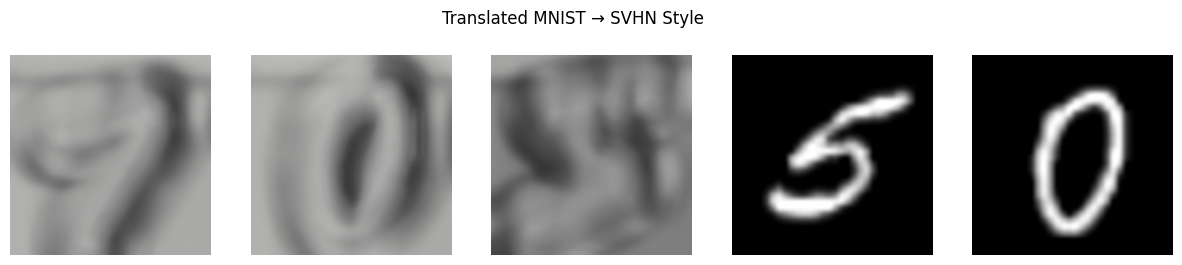

In [34]:
import matplotlib.pyplot as plt
import random

samples = random.sample(translated_dataset.image_paths, 5)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, path in zip(axs, samples):
    img = Image.open(path)
    ax.imshow(img)
    ax.axis("off")
plt.suptitle("Translated MNIST → SVHN Style")
plt.show()
